<h1>Mục Lục<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Thu-thập-dữ-liệu" data-toc-modified-id="1.-Thu-thập-dữ-liệu"><span class="toc-item-num">1&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#2.-Khám-phá-dữ-liệu" data-toc-modified-id="2.-Khám-phá-dữ-liệu"><span class="toc-item-num">2&nbsp;&nbsp;</span>Khám phá dữ liệu</a></span><ul class="toc-item"></ul></li><li><span><a href="#3.-Các-câu-hỏi-cần-trả-lời" data-toc-modified-id="3.-Các-câu-hỏi-cần-trả-lời"><span class="toc-item-num">3&nbsp;&nbsp;</span>Các câu hỏi cần trả lời</a></span></li><li><span><a href="#4.-Nhìn-lại-quá-trình-làm-đồ-án" data-toc-modified-id="4.-Nhìn-lại-quá-trình-làm-đồ-án"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nhìn lại quá trình làm đồ án</a></span></li><li><span><a href="#5.-Tài-liệu-tham-khảo" data-toc-modified-id="5.-Tài-liệu-tham-khảo"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

# 1. Thu thập dữ liệu

- **Chủ đề của dữ liệu:** **`Traffic accident in UK`**
- **Nguồn dữ liệu:** **`Kaggle`**
- **Link:** https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales
- **License:** **`Open Database`**
- **Cách tác giả thu thập dữ liệu:**
    - Dữ liệu được tác giả thu thập từ trang web của UK Department of Transport
    - Dữ liệu được tổng hợp từ các báo cáo của cảnh sát về thông tin các vụ tai nạn giao thông

# 2. Khám phá dữ liệu

In [1]:
! which python

/home/luatvy/anaconda3/envs/p4ds-env/bin/python


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from IPython import display
import numpy as np


In [ ]:
# Các thư viện dùng thêm
! pip install folium
import folium 

## Đọc dữ liệu từ file CSV đã tải xuống sẵn vào DataFrame

<b>Dữ liệu về số vụ tai nạn tại nước Anh từ năm 2012 - 2014</b>

In [3]:
df = pd.read_csv("accidents_2012_to_2014.csv")
df.head()

/home/luatvy/anaconda3/envs/p4ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [4]:
df.shape

(464697, 33)

Dữ liệu gồm 464.697 dòng và 33 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu và quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một vụ tai nạn. Và các dòng thì có ý nghĩa giống nhau.

## Dữ liệu có các dòng bị lặp không?

In [5]:
df.duplicated().any()

True

Tồn tại những dòng trùng lặp. Và theo dự đoán rằng người thu thập dữ liệu này khi thu thập nhiều dữ liệu nhỏ để ghép thành một dữ liệu lớn này đã vô tình ghép trùng những dòng đã tồn tại nên ta sẽ xóa đi những dòng trùng lặp đồng thời reset index của df.

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(430550, 33)

Như vậy dữ liệu còn 430.550 dòng

## Mỗi cột có ý nghĩa gì?

Vì người thu thập dữ liệu không nói rõ về các cột nên sẽ tìm một số nguồn khác có thông tin về các dữ liệu:
https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7752&type=Data%20catalogue#!/documentation

Mô tả các cột như sau:
- **Accident_Index**: Mã định danh cho một vụ tai nạn.
- **Location_Easting_OSGR** và **Location_Northing_OSGR**: Tọa độ sử dụng Grid reference system để tham chiếu tìm vị trí. (Có thể sử dụng trang https://magic.defra.gov.uk/ để tìm vị trí của tọa độ đã cho) .
- **Longitude** và **Latitude**: Kinh độ và vĩ độ của vị trí xảy ra tai nạn.
- **Police_Force**: Lực lượng cảnh sát chịu trách nhiệm tại khu vực xảy ra tai nạn hoặc là lực lượng cảnh sát được giao nhiệm vụ xử lí vụ tai nạn???
- **Accident_Severity**: Mức độ của tai nạn (1-nặng, 2-trung bình, 3-nhẹ) .
- **Number_of_Vehicles**: Số lượng phương tiện trong vụ tai nạn.
- **Number_of_Casualties**: Số lượng thương vong. (bị thương hoặc tử vong)
- **Date**: Ngày tháng năm xảy ra tai nạn
- **Day_of_Week**: Thứ trong tuần xảy ra tai nạn. (chủ nhật, thứ hai, ...)
- **Time**: Giờ và phút xảy ra tai nạn.
- **Local_Authority_(District)**: thị trấn, quận nơi xảy ra tai nạn.
- **Local_Authority_(Highway)**: Cơ quan chịu trách nhiệm vận hành, quản lý và bảo trì đường giao thông công cộng tại nơi xảy ra tai nạn.
- **1st_Road_Class**: Phân loại đường. (đường của nhà nước, đường của địa phương tự quản, ...)
- **1st_Road_Number**: Tên đường xảy ra tai nạn. (dạng số)
- **Road_Type**: Loại đường (đường một chiều, đường nhánh, ...)
- **Speed_limit**: Tốc độ cho phép trên con đường xảy ra tai nạn(tính theo mph)
- **Junction_Detail**: Chi tiết nút giao thông.
- **Junction_Control**: kiểm soát nút giao thông. (đèn tín hiệu tự động, tự do di chuyển không kiểm soát, ...).
- **2nd_Road_Class**: Nếu vụ tai nạn xảy ra tại giao hai con đường thì là phân loại cho đường thứ hai.
- **2nd_Road_Number**: Tương tự trên nếu xảy ra tại nơi giao hai con đường thì là số đường của đường thứ hai.
- **Pedestrian_Crossing-Human_Control**: Có hay không người điều khiển khu vực qua đường dành cho người đi bộ trong bán kính 50 mét ở khu tai nạn.
- **Pedestrian_Crossing-Physical_Facilities**: Cơ sở vật chất của khu vực qua đường cho người đi bộ (vạch kẻ đường, đường hầm, cầu vượt, ...)
- **Light_Conditions**: Điều kiện ánh sáng tại nơi xảy ra tai nạn.
- **Weather_Conditions**: Điều kiện thời tiết tại nơi xảy ra tai nạn.
- **Road_Surface_Conditions**: Điều kiện mặt đường tại nơi xảy ra tai nạn.
- **Special_Conditions_at_Site**: Điều kiện đặc biệt nào khác tại nơi xảy ra tai nạn. (đường hư, ...)
- **Carriageway_Hazards**: Có vật cản gì tại nơi xảy ra tai nạn hay không. (Động vật băng qua đường, ...)
- **Urban_or_Rural_Area**: Nội ô hay ngoại ô.
- **Did_Police_Officer_Attend_Scene_of_Accident**: Cảnh sát có đến hiện trường vụ tai nạn không.
- **LSOA_of_Accident_Location**: Vị trí cho những vùng nhỏ không có trên bản đồ lớn ở Anh. (Tra cứu tại https://www.ukcrimestats.com/)
- **Year**: Năm xảy ra tai nạn

Các dữ liệu về số, mã của vùng được tra ở file `7752_road-accident-safety-data-guide.xls`

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

**Các cột có dạng kiểu object**

In [8]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)',
       'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

Ta sẽ xem cụ thể trong các cột Object có các kiểu dữ liệu gì?

In [9]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [10]:
for i in range(0,len(obj_cols)):    
    print(obj_cols[i], open_object_dtype(df[obj_cols[i]]))

Accident_Index {<class 'str'>}
Date {<class 'str'>}
Time {<class 'str'>, <class 'float'>}
Local_Authority_(Highway) {<class 'str'>}
Road_Type {<class 'str'>}
Junction_Control {<class 'str'>, <class 'float'>}
Pedestrian_Crossing-Human_Control {<class 'str'>}
Pedestrian_Crossing-Physical_Facilities {<class 'str'>}
Light_Conditions {<class 'str'>}
Weather_Conditions {<class 'str'>}
Road_Surface_Conditions {<class 'str'>, <class 'float'>}
Special_Conditions_at_Site {<class 'str'>, <class 'float'>}
Carriageway_Hazards {<class 'str'>, <class 'float'>}
Did_Police_Officer_Attend_Scene_of_Accident {<class 'str'>, <class 'float'>}
LSOA_of_Accident_Location {<class 'str'>, <class 'float'>}


* Ta sẽ tiền xử lí ở cột `Date` khi dữ liệu ở đây chưa ở dạng datetime để dễ xử lí.
* Còn các cột chứa chuỗi str và chứa cả kiểu float tức là chứa các giá trị nan.

## Tiền xử lí

### Chuyển dtype của cột "Date" sang datetime

In [11]:
df.Date = pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time).dt.time

**Chuyển các cột**"Police_Force", "Accident_Severity", "Local_Authority_(District)", "1st_Road_Class", "2nd_Road_Class", "Urban_or_Rural_Area" **sang dạng categorical**

In [12]:
df[["Police_Force", "Accident_Severity", "Local_Authority_(District)", \
"1st_Road_Class", "2nd_Road_Class", "Urban_or_Rural_Area"]] = df[["Police_Force", "Accident_Severity", \
"Local_Authority_(District)","1st_Road_Class", "2nd_Road_Class", "Urban_or_Rural_Area"]].astype('str')

### Kiểu dữ liệu của các cột sau khi xử lí

In [13]:
df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                           object
Accident_Severity                                      object
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                             object
Local_Authority_(Highway)                              object
1st_Road_Class                                         object
1st_Road_Number                                         int64
Road_Typ

## Tiếp tục khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

**Ta có 12 cột Numeric**: "Location_Easting_OSGR",
 "Location_Northing_OSGR",
 "Longitude",
 "Latitude",
 "Number_of_Vehicles",
 "Number_of_Casualties",
 "Date",
 "Day_of_Week",
 "Time",
 "1st_Road_Number",
 "2nd_Road_Number",
 "Year"

Ta sẽ tìm tỉ lệ % các giá trị thiếu, min và max của mỗi cột numeric.

In [14]:
df_temp=df[["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude", "Latitude", "Number_of_Vehicles", "Number_of_Casualties", "Date", "Day_of_Week", "Time", "1st_Road_Number", "2nd_Road_Number", "Year"]]
def missing_ratio(df):
    return df.isna().mean() * 100
nume_col_profiles_df = df_temp.agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_profiles_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Number,2nd_Road_Number,Year
missing_ratio,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003019,0.0,0.0,0.0
min,65510.0,10290.0,-7.509162,49.912941,1.0,1.0,2012-01-01 00:00:00,1.0,NaN,0.0,-1.0,2012.0
max,655370.0,1190858.0,1.759382,60.597984,67.0,93.0,2014-12-31 00:00:00,7.0,NaN,9999.0,9999.0,2014.0


- **Nhận xét:**
    - Cột Time có giá trị thiếu các cột còn lại thì đầy đủ.
    - Ở cột 2nd_Road_Number giá trị min là -1, theo mô tả thì -1 tức là nan (không có giá trị).
    - Số lượng giá trị thiếu của Time là rất rất nhỏ so với tổng số lượng dòng nên ta sẽ bỏ đi các giá trị thiếu này luôn.

In [15]:
# Loại bỏ các dòng có Time là nan
df=df.dropna(subset=['Time'])

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

**Các cột có dạng Categorical gồm:** "Accident_Index",
 "Police_Force",
 "Accident_Severity",
 "Local_Authority_(District)",
 "Local_Authority_(Highway)",
 "1st_Road_Class",
 "Road_Type",
 "Speed_limit",
 "Junction_Detail",
 "Junction_Control",
 "2nd_Road_Class",
 "Pedestrian_Crossing-Human_Control",
 "Pedestrian_Crossing-Physical_Facilities",
 "Light_Conditions",
 "Weather_Conditions",
 "Road_Surface_Conditions",
 "Special_Conditions_at_Site",
 "Carriageway_Hazards",
 "Urban_or_Rural_Area",
 "Did_Police_Officer_Attend_Scene_of_Accident",
 "LSOA_of_Accident_Location"

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu, số lượng giá trị khác nhau, list/array các giá trị khác nhau.

In [16]:
df_temp = df[["Accident_Index", "Police_Force", "Accident_Severity", "Local_Authority_(District)", "Local_Authority_(Highway)", "1st_Road_Class", "Road_Type", "Speed_limit", "Junction_Detail", "Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "LSOA_of_Accident_Location"]]
def num_diff_vals(df):
    return len(df.value_counts().index)
def diff_vals(df):
    return list(df.unique())
cate_col_profiles_df = df_temp.agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Accident_Index,Police_Force,Accident_Severity,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,38.926968,...,0.0,0.0,0.0,0.0,0.172343,0.000465,0.000697,0.0,0.000465,6.667023
num_diff_vals,263811,51,3,380,207,6,6,7,0,4,...,3,6,5,9,5,8,6,2,2,34284
diff_vals,"[201201BS70001, 201201BS70002, 201201BS70003, ...","[1, 48, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16,...","[3, 2, 1]","[12, 1, 11, 28, 570, 3, 5, 4, 8, 2, 9, 30, 31,...","[E09000020, E09000033, E09000013, E09000005, E...","[3, 4, 5, 6, 1, 2]","[Single carriageway, One way street, Roundabou...","[30, 50, 40, 20, 70, 60, 10]",[nan],"[Automatic traffic signal, Giveway or uncontro...",...,"[None within 50 metres, Control by other autho...","[Pedestrian phase at traffic signal junction, ...","[Darkness: Street lights present and lit, Dayl...","[Fine without high winds, Raining without high...","[Dry, Wet/Damp, Frost/Ice, Snow, Flood (Over 3...","[None, Roadworks, Mud, Auto traffic singal out...","[None, Other object in carriageway, Any animal...","[1, 2]","[Yes, No, nan]","[E01002821, E01004760, E01002893, E01002886, E..."


- **Nhận xét:**
    - Ở các cột categorical thì có vẻ giá trị thiếu đã nhiều hơn so với các cột Numeric.
    -Tuy nhiên cột "Junction_Detail" tất cả giá trị đều là nan nên sẽ không thể lấy được thông tin gì từ cột này nên ta cũng drop cột này.

In [17]:
# Xóa cột Junction_Detail
df=df.drop(['Junction_Detail'],axis=1)

# 3. Các câu hỏi cần trả lời

## 1. Địa điểm xảy ra nhiều vụ tai nạn nhất và vị trí phân bố của các vụ tai nạn như thế nào?

- Điều mà mọi người sẽ chú ý đầu tiên khi nhìn vào vị trí là sẽ tìm hiểu xem nơi nào là nơi xảy ra nhiều tai nạn nhất. Ở đây để cụ thể và chính xác hơn khi tra vị trí thì ta dùng tọa độ được tạo ra và sử dụng tại Anh là OSGR (Ordnance Survey National Grid).
- Khi thử tra cùng một tọa độ của nhiều vụ bằng OSGR thì Longitude và Latitude sẽ có thể chênh lệch giữa các vụ một số rất rất nhỏ.
- Ví dụ cùng tọa độ OSGR: 531630, 181170 thì vĩ độ có thể là 51.514074 hoặc 51.514075

In [18]:
df_coord = pd.DataFrame(df.groupby(['Location_Easting_OSGR', 'Location_Northing_OSGR'])['Accident_Index'].count().sort_values())
df_coord.columns=['Counts']
df_coord

Counts
Location_Easting_OSGR Location_Northing_OSGR        
65510                 801820                       1
497390                148790                       1
                      145043                       1
                      100390                       1
497389                370776                       1
...                                              ...
532970                180950                      16
527830                176540                      17
532700                181110                      19
534940                181890                      24
531630                181170                      30

[402368 rows x 1 columns]

Như trên có thể thấy tọa độ **531630, 181170** xảy ra 30 vụ tai nạn trong 3 năm.<br>
Theo tra cứu từ magicmap thì đây là một giao lộ ở ngay trung tâm thủ đô của Anh là Luân Đôn. Phải chăng do đông người, xe cộ đông đúc nên dễ gây tai nạn. Ta sẽ tìm hiểu nguyên nhân của các vụ tai nạn ở phần dưới.

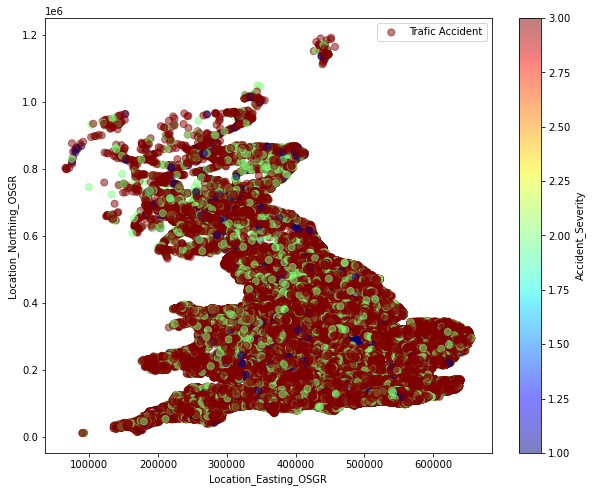

In [19]:
fig, ax = plt.subplots()
df['Accident_Severity'] = df['Accident_Severity'].astype('int')
df.plot(
    kind="scatter",
    x="Location_Easting_OSGR",
    y="Location_Northing_OSGR",
    alpha=0.5,
    s=50,
    label="Trafic Accident",
    figsize=(10, 8),
    c="Accident_Severity",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    ax=ax
)
plt.show()

Các vụ tai nạn được phân bố rất dày đặc từ khoảng **250000-600000 (Easting), 100000-350000 (Northing)**. Sau đó hẹp dần và trải dài về phía tây bắc.

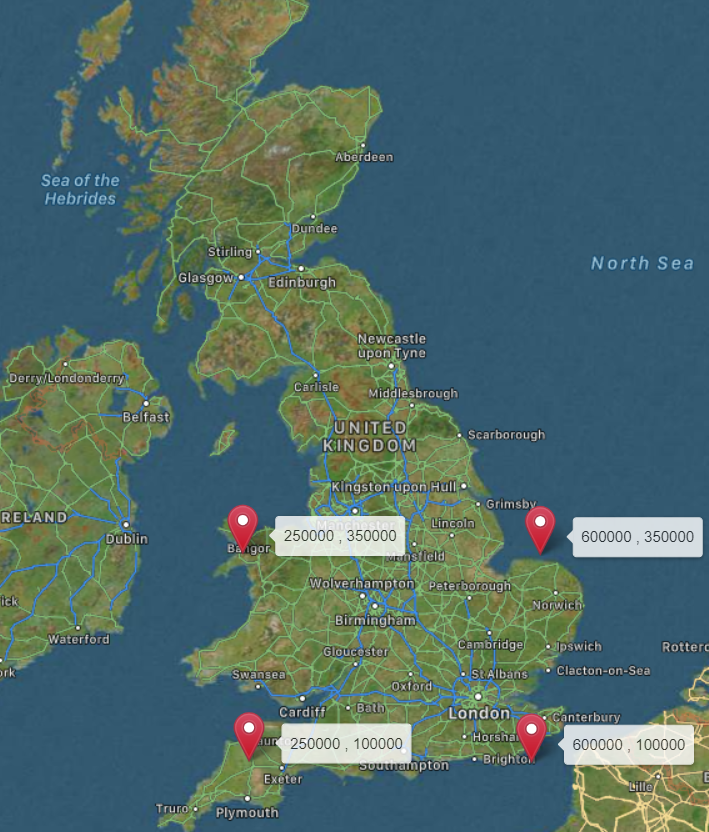

In [20]:
display.Image("https://i.ibb.co/TW8nxpR/Map-Final.png", width = 600, height = 300)

**Từ bản đồ có thể thấy các vụ tai nạn gần như phân bố nhiều nhất ở vùng phía Nam của UK, nơi có nhiều thành phố và người dân nhất ở UK.**

### Cụ thể hơn, ta sẽ đi vào một vùng nhỏ và rõ hơn.

Ta sẽ sử dụng cột `LSOA_of_Accident_Location` để tìm ra một vùng nhỏ hơn xảy ra nhiều vụ tai nạn nhất.

E01004736    454
E01032739    448
E01000004    323
E01002444    233
E01004689    228
            ... 
E01017554      1
E01008547      1
E01018569      1
E01030131      1
E01032811      1
Name: LSOA_of_Accident_Location, Length: 34284, dtype: int64


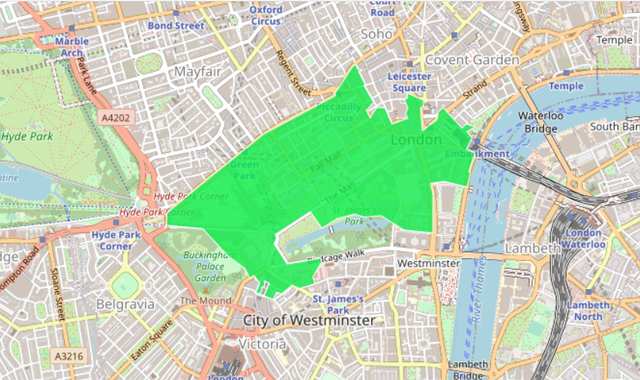

In [21]:
print(df['LSOA_of_Accident_Location'].value_counts())
display.Image("https://i.ibb.co/jJ00rLk/Smaller-Map.png", width = 600, height = 300)

Địa điểm tìm thấy là **E01004736** với **454 vụ tai nạn** ở ngay trung tâm Luân Đôn, đồng thời cũng là khu trung tâm mua sắm lớn.

In [22]:
df_temp = df[df['LSOA_of_Accident_Location']=='E01004736']
df_temp = df_temp.reset_index(drop=True)

Ta sẽ tạo bản đồ Folium (đã cài đặt thư viện). Lấy vĩ độ, kinh độ một điểm bất kì trong vùng trên (Cũng có thể dùng trung bình các điểm đó).

In [23]:
location = df_temp.iloc[0][['Latitude','Longitude']]
Area = folium.Map(location=location,zoom_start=15)
for i in range(0,len(df_temp)):
     Severity = df_temp.iloc[i]['Accident_Severity'] 
     if Severity == 1:
        color = 'purple'
     elif Severity == 2:
        color = 'red'
     else:
        color = 'blue'  
     pop = f'Casualties:{df_temp.iloc[i]["Number_of_Casualties"]}\n Vehicle:{df_temp.iloc[i]["Number_of_Vehicles"]}\n Spd_lim:{df_temp.iloc[i]["Speed_limit"]}'
     folium.Marker([df_temp['Latitude'].iloc[i],df_temp['Longitude'].iloc[i]], popup=pop, icon=folium.Icon(color=color, icon='info-sign')).add_to(Area) 
Area

- Bằng cách Zoom lên quan sát, thì thấy các giao lộ là nơi có nhiều vụ tai nạn hơn cả. 
- Theo như tìm hiểu, Con đường Piccadilly có vị thế giao thông nằm gần các khu vực mua sắm và giải trí lớn nên con đường trở thành một trong những địa điểm thu hút khách du lịch nhộn nhịp nhất ở thủ đô Luân Đôn. Và kéo theo là lưu lượng giao thông lớn, khiến tai nạn cũng là khá nhiều.
- Đồng thời đa phần các vụ tai nạn chỉ là nhẹ, xay sát.
- **Vậy có thể thấy rằng các vụ tai nạn sẽ xảy ra nhiều ở những khu vực trung tâm thành phố, thủ đô, tại những con đường đông đúc. Tuy nhiên, dù có nhiều vụ tai nạn nhưng trong suốt 3 năm thì số tai nạn nghiêm trọng và đặc biệt nghiêm trọng là không nhiều. Cho thấy rằng, ở nội ô, trung tâm xe cộ sẽ không di chuyển nhanh với tốc độ cao (Speed_limit = 30) nên khi va chạm cũng không gây ra hậu quả lớn.**

## 2. Số lượng các vụ tai nạn giao thông hàng tháng, hàng năm thay đổi như thế nào?


- Vẽ biểu đồ cột nhóm gồm cột số lượng vụ và số lượng thương vong của năm.

In [24]:
Accident_Index = df.groupby('Year')['Accident_Index'].count()
Number_of_Casualties = df.groupby('Year')['Number_of_Casualties'].sum()
Acci_Casual = pd.DataFrame(data=[Accident_Index, Number_of_Casualties])
Acci_Casual

Year,2012,2013,2014
Accident_Index,145566,138651,146320
Number_of_Casualties,195718,183659,194475


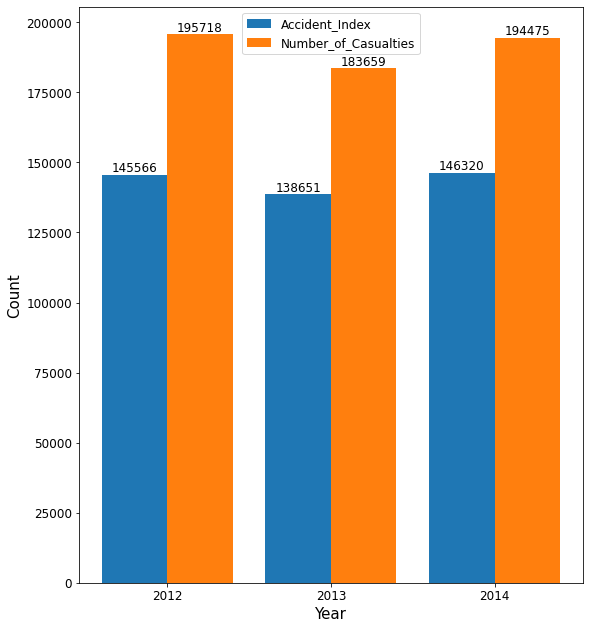

In [25]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_axes([0,0,1,1])
x = np.arange(2012,2015)
plt.bar(x-0.2, Acci_Casual.loc['Accident_Index'], 0.4,label='Accident_Index')
plt.bar(x+0.2, Acci_Casual.loc['Number_of_Casualties'], 0.4, label='Number_of_Casualties')
plt.xticks(x, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
for i in x:
        plt.text(i-0.2, Acci_Casual.loc['Accident_Index'][i] + 1000, Acci_Casual.loc['Accident_Index'][i], ha='center',fontsize=12)
        plt.text(i+0.2, Acci_Casual.loc['Number_of_Casualties'][i] + 1000, Acci_Casual.loc['Number_of_Casualties'][i], ha='center',fontsize=12)
plt.legend(fontsize=12)
plt.show()

- **Nhận xét:**
    - Từ năm 2012 đến 2013: 
        - Số vụ tai nạn giảm xuống gần 7000 vụ
        - Số lượng thương vong cũng giảm hơn 10000 vụ

    - Từ năm 2013 đến 2014:
        - Số vụ tai nạn lại tăng lên hơn 7000 vụ
        - Số lượng thương vong cũng tăng lên khoảng 10000 vụ

**Đi sâu hơn vào số vụ của các tháng trong từng năm**

In [26]:
# Ta sẽ tạo thêm một cột mới cho dữ liệu là cột Month(tháng xảy ra tai nạn)
df['Month'] = df['Date'].dt.month
df_temp = df.groupby(['Year','Month'])['Accident_Index'].count().unstack(level=0)

Text(0, 0.5, 'Num_Accident')

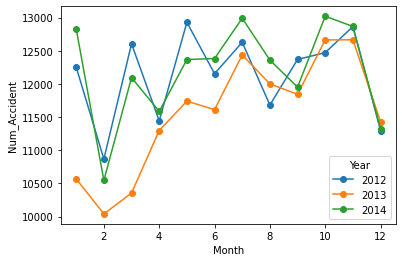

In [27]:
# Vẽ biểu đồ đường
df_temp.plot.line(marker='o')
plt.ylabel('Num_Accident')

**Nhận xét:**
- Năm 2013 khác với hai năm 2012 và 2014 trong khoảng tháng 1 - 4 số vụ tai nạn ít hơn khá nhiều. 
    - Có lẽ là nguyên nhân dẫn đến số lượng vụ tai nạn cả năm ít hơn hai năm kia.
- Cả 3 năm đều có sự giảm mạnh số vụ tai nạn trong khoảng tháng 1 - 2 và tháng 11 - 12. 
    - Có lẽ là vào mùa đông(mùa đông của UK bắt đầu từ tháng 12 đến tháng 2), tuyết phủ quá dày không tiện đi lại nên dẫn đến lưu lượng tham gia giao thông thấp, ít vụ tai nạn.
- Mỗi năm thì từ tháng 10 - 11 số vụ tai nạn là đạt đỉnh.

### 3. So sánh đặc điểm tai nạn ở vùng thành thị và nông thôn (1 - Urban, 2 - Rural) như thế nào?

In [28]:
Urban_Rural = df.groupby(['Year','Urban_or_Rural_Area'])['Accident_Index'].count().unstack()
Urban_Rural

Urban_or_Rural_Area,1,2
Year,,
2012,95352,50214
2013,89997,48654
2014,96285,50035


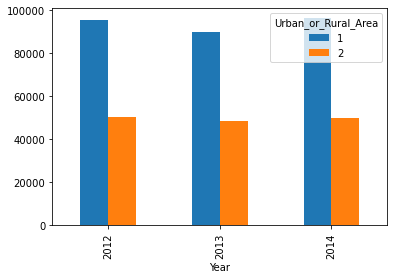

In [29]:
Urban_Rural.plot.bar()
plt.show()


**Nhận xét:**
- Rõ ràng số vụ tai nạn ở vùng nông thôn là thấp hơn rất nhiều chỉ bằng khoảng một nửa số vụ tai nạn tại thành thị. 
- Lí do có lẽ là do lưu lượng xe khá là khác biệt giữa hai vùng khi thành phố có dân cư và xe cộ đông đúc hơn hẳn so với nông thôn.

**Ta sẽ đi sâu hơn vào các điều kiện khách quan khác như:** Điều kiện ánh sáng, thời tiết, mặt đường khi xảy ra các vụ tai nạn ở hai vùng

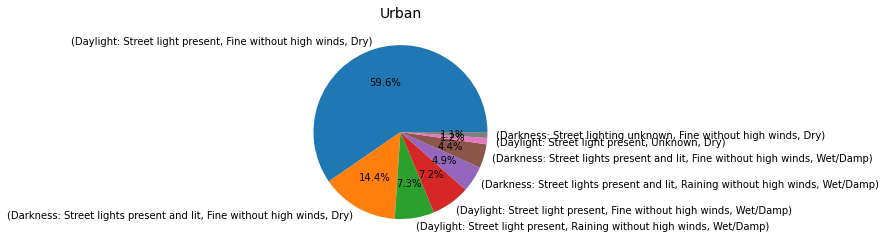

In [30]:
Urban = df[df['Urban_or_Rural_Area']=='1'].iloc[:,23:26].value_counts()
Urban[:8].plot.pie(autopct="%.1f%%")
plt.title("Urban", fontsize=14)
plt.ylabel("")
plt.show()

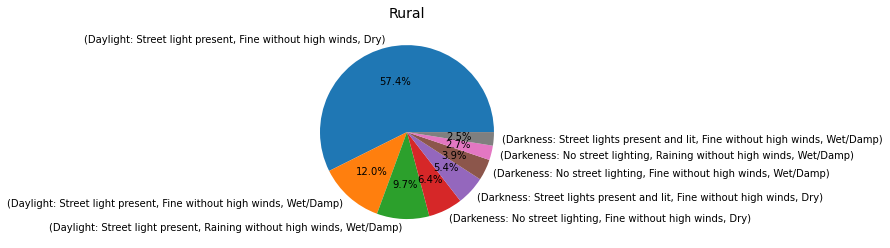

In [31]:
Rural = df[df['Urban_or_Rural_Area']=='2'].iloc[:,23:26].value_counts()
Rural[:8].plot.pie(autopct="%.1f%%")
plt.title("Rural", fontsize=14)
plt.ylabel("")
plt.show()

**Nhận xét:**
- Cả hai vùng Thành thị và nông thôn đều có số vụ tai nạn chiếm nhiều nhất vào ở ban ngày, ánh sáng đầy đủ, thời tiết tốt mặt đường khô. Lí do có thể đưa ra rằng các vụ tai nạn đều do yếu tố chủ quan tức người điều khiển xe, thêm vào đó là lưu lượng xe đông hơn nhiều khi thời tiết tốt đã gây ra các vụ tai nạn.
- Ở thành thị, phần chiếm nhiều thứ 2 là do trời tối mà người điều khiển xe có thể thiếu tầm nhìn ở một số điểm nhất định, còntừ phần chiếm nhiều thứ 3 trở đi thì đa số đều do mặt đường ẩm ướt, trơn trượt đã dễ gây tai nạn hơn.
- Tại nông thôn, từ phần thứ 2 trở đi thì đa phần sẽ do đường trơn trượt và trời tối tương tự với thành thị.


**Kết luận**: Ở thành thị và cả nông thôn, xét các điều kiện khách quan thì **trời tối** và **mặt đường ẩm ướt trơn trượt** + **mưa** là những điều kiện dễ gây tai nạn nhất. Vào những thời điểm này thì mọi người phải cẩn thận hơn khi ra đường.

###  4. Các district nào xảy ra nhiều tai nạn nhất (lấy top 3)? Trong các district trên các yếu tố ánh sáng, thời tiết, mặt đường ảnh hưởng như thế nào đến số lượng các vụ tai nạn?

In [32]:
# Lấy top 3 các district xảy ra nhiều vụ tai nạn
top_district_accident = df.groupby('Local_Authority_(District)')['Accident_Index'].count().nlargest(3)
top_district_accident

Local_Authority_(District)
300    7289
204    5656
1      4653
Name: Accident_Index, dtype: int64

Text(0, 0.5, 'Number_of_Accident')

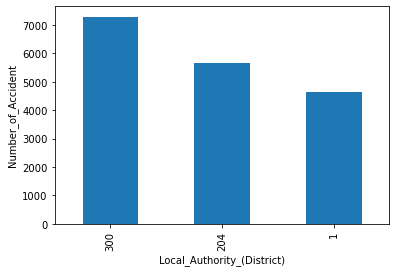

In [33]:
top_district_accident.plot(kind = 'bar')
plt.ylabel('Number_of_Accident')

**Nhận xét:**
- Các District có mã là 300, 204 và 1 là các District xảy ra nhiều vụ tai nạn nhất

Tiếp theo ta sẽ phân tích các yếu tố khách quan như: ánh sáng, thời tiết, điều kiện mặt đường ảnh hưởng đến số vụ tai nạn ở các District trên như thế nào

In [34]:
df[((df['Local_Authority_(District)'] == top_district_accident.index[0]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[1]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[2]))] \
[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']].value_counts().nlargest(5).to_frame()

0
Light_Conditions                        Weather_Conditions         Road_Surface_Conditions      
Daylight: Street light present          Fine without high winds    Dry                      9237
Darkness: Street lights present and lit Fine without high winds    Dry                      2533
Daylight: Street light present          Raining without high winds Wet/Damp                 1041
                                        Fine without high winds    Wet/Damp                  959
Darkness: Street lights present and lit Raining without high winds Wet/Damp                  812

**Nhận xét:**
- Với các điều kiện thời tiết tốt, gió nhẹ, mặt đường khô ráo, đủ ánh sáng thì số vụ tai nạn giao thông xaỷ ra rất nhiều

In [35]:
df[((df['Local_Authority_(District)'] == top_district_accident.index[0]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[1]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[2]))] \
[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']].value_counts().nsmallest(5).to_frame()

0
Light_Conditions               Weather_Conditions         Road_Surface_Conditions   
Darkeness: No street lighting  Other                      Wet/Damp                 1
                               Fog or mist                Wet/Damp                 1
Daylight: Street light present Snowing without high winds Dry                      1
Darkeness: No street lighting  Raining without high winds Frost/Ice                1
Daylight: Street light present Snowing with high winds    Dry                      1

**Nhận xét:**
- Với các điều kiện thời tiết xấu, tuyết rơi, gió mạnh, đường tối thì số vụ tai nạn giao thông xảy ra rất ít.

**Kết luận:**
- Thời tiết tốt thì số lượng phương tiện tham gia giao thông nhiều nên nhiều tai nạn
- Thời tiết xấu số lượng phương tiên tham gia ít nên ít tai nạn
- Yếu tố cốt lõi xảy ra tai nạn giao thông là do số lượng phương tiên tham gia quá đông

### 5. Việc giới hạn tốc độ trên đường có làm giảm số mức độ nghiêm trọng của các vụ tai nạn hay không? 

In [36]:
# Số lượng các vụ tai nạn phân bố theo Speed_Limit như thế nào
accident_speed_limit = df['Speed_limit'].value_counts()
accident_speed_limit

30    279465
60     61170
40     35421
70     29794
50     16357
20      8329
10         1
Name: Speed_limit, dtype: int64

<AxesSubplot:>

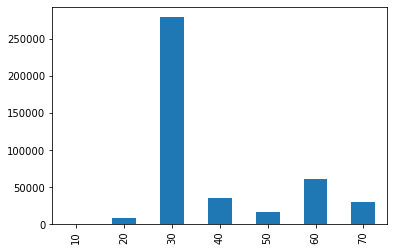

In [37]:
accident_speed_limit.sort_index().plot(kind='bar')

- Ta nhận thấy có rất nhiều vụ tai nạn xảy ra trên đoạn đường có tốc độ giới hạn là 30 mph
- Nguyên nhân ở đây có thể là do tốc độ cho phép này phổ biến trên nhiều loại đường

**Accident_Severity** với mức độ nghiêm trọng giảm dần là **1 - 2 - 3** 

In [38]:
# Thống kê số lượng các vụ tai nạn theo mức độ nghiêm trọng và tốc độ tối đa cho phép
Number_Accident_Severity = df.groupby('Speed_limit')['Accident_Severity'].value_counts()\
    .rename('Number_Accident_Severity').to_frame().unstack(-1)

# Thay các giá trị nan bằng 0
Number_Accident_Severity.replace(np.nan, 0, inplace=True)
Number_Accident_Severity

Number_Accident_Severity                   
Accident_Severity                        1        2         3
Speed_limit                                                  
10                                     0.0      0.0       1.0
20                                    43.0   1245.0    7041.0
30                                  1691.0  36203.0  241571.0
40                                   447.0   5295.0   29679.0
50                                   330.0   2590.0   13437.0
60                                  1784.0  12213.0   47173.0
70                                   607.0   3649.0   25538.0

In [39]:
# Thống kê theo phần trăm số lượng các vụ tai nạn theo mức độ nghiêm trọng và tốc độ tối đa cho phép
para = Number_Accident_Severity['Number_Accident_Severity'].sum(axis=1)
Ratio_Accident_Severity = Number_Accident_Severity['Number_Accident_Severity'].apply(lambda s: s/para, axis=0)
Ratio_Accident_Severity

Accident_Severity,1,2,3
Speed_limit,,,
10,0.000000,0.000000,1.000000
20,0.005163,0.149478,0.845360
30,0.006051,0.129544,0.864405
40,0.012620,0.149488,0.837893
50,0.020175,0.158342,0.821483
60,0.029165,0.199657,0.771179
70,0.020373,0.122474,0.857152


- **Nhận xét:**
    - Khi lưu thông trên đoạn đường có tốc độ cho phép lớn thì tỉ lệ xảy ra tai nạn nghiêm trọng cũng cao
    - Ở cột có Accident_Severity = 1 (mức độ nghiêm trọng nhất) thì cái tỉ lệ tăng từ 0.005163 đến 0.029165 theo Speed_Limit
    - Với tốc độ càng cao thì tỉ lệ xảy ra mức độ nghiêm trọng càng tệ

# 4. Nhìn lại quá trình làm đồ án

- **Thuận lợi:**
    - Đã có tí kinh nghiệm trong việc phân tích dữ liệu đơn giản như việc dùng pandas, matplotlib,...
    - Tập dữ liệu có nhiều thuộc tính nên thuận lợi trong việc phân tích như dùng nhiều loại biểu đồ khác nhau,...
    - Tập dữ liệu cũng không có nhiều thuộc tính khó tiền xử lí.
- **Khó khăn:**
    - Khó khăn trong việc đặt câu hỏi và trả lời. Làm sao để người đọc dễ nhìn thấy vấn đề và dễ hiểu.
- **Phát triển thêm nếu có thời gian:**
    - Nếu có thêm thời gian nhóm sẽ tìm hiểu thêm các thư viện khác trong việc trực quan và phân tích.
    - Đặt thêm câu hỏi cho các vấn đề
    - Áp dụng học máy để dự đoán các vụ tai nạn trong tương lai.

# 5. Tài liệu tham khảo

- 1. Tập dữ liệu trên Kaggle
    - https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales
- 2. Một số thông tin bổ sung về dữ liệu
    - https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7752&type=Data%20catalogue#!/documentation
- 3. Tra cứu vùng theo `LSOA_of_Accident_Location`
    - https://www.ukcrimestats.com/